In [35]:
import pandas as pd
from sodapy import Socrata
import json
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import requests as req
import random 
import matplotlib


In [36]:
#Connecting to API
length_data = 468,761
app_token = "X2gMakh5B2retT4oRxgQy2A9R"
#$$app_token=" + app_token
url = ("https://data.cityofnewyork.us/resource/7x9x-zpz6.json?$limit=400000&$offset=0")

results = req.get(url).json()

results_df = pd.DataFrame(data = results, columns = {"boro_nm", "rpt_dt", "ofns_desc","lat_long","law_cat_cd","prem_typ_desc"})

#rename columns
cleaned_df = results_df.rename(columns = {"boro_nm":"Borough", "rpt_dt": "Report Date", "ofns_desc": "Offense Decription", "lat_long":"Location", 
                                          "law_cat_cd":"Degree Of Crime", "prem_typ_desc":"Location Type"})


In [37]:
#Crime Data Per Degree of Crime

#MISDEMEANOR
mis_filter = cleaned_df['Degree Of Crime']=='MISDEMEANOR'
mis_final = cleaned_df[mis_filter]
borough_1_df = mis_final['Borough'].value_counts()

#FELONY
fel_filter = cleaned_df['Degree Of Crime']=='FELONY'
fel_final = cleaned_df[mis_filter]
borough_2_df = fel_final['Borough'].value_counts()

#VIOLATION
vio_filter = cleaned_df['Degree Of Crime']=='VIOLATION'
vio_final = cleaned_df[vio_filter]
borough_3_df = vio_final['Borough'].value_counts()



combined_all_df = pd.DataFrame({"Misdemeanor":borough_1_df, "Felony":borough_2_df, "Violation":borough_3_df}) 

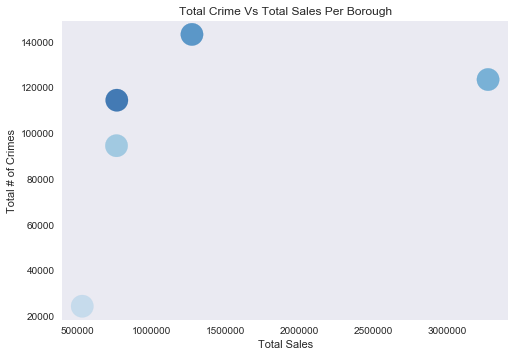

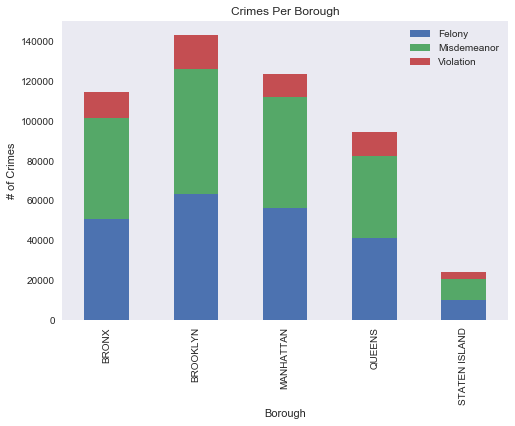

In [38]:
#plot 

combined_all_df.plot(kind='bar', stacked=True)
plt.title("Crimes Per Borough")
plt.xlabel("Borough")
plt.ylabel("# of Crimes")
plt.savefig("crime_graph.png")
plt.show()

In [39]:
#Sales Data Dependencies 
#Read CSVs and Combine to One Dataframe
file_one = "rollingsales_bronx.csv"
file_two = "rollingsales_brooklyn.csv"
file_three = "rollingsales_manhattan.csv"
file_four = "rollingsales_queens.csv"
file_five = "rollingsales_statenisland.csv"

bronx_pd = pd.read_csv(file_one)
brooklyn_pd = pd.read_csv(file_two)
manhattan_pd = pd.read_csv(file_three)
queens_pd = pd.read_csv(file_four)
staten_island_pd = pd.read_csv(file_five)
sales_df = pd.concat([manhattan_pd, bronx_pd, brooklyn_pd, queens_pd, staten_island_pd])

#Clean missing rows, change Borough numbers to names and sort out residential buildings
sales_df['BOROUGH'] = sales_df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
sales_df['BUILDING CLASS'], sales_df['CATEGORY'] = sales_df['BUILDING CLASS CATEGORY'].str.split(' ', 1).str
del (sales_df['BUILDING CLASS CATEGORY'], sales_df['BLOCK'], sales_df['LOT'],  sales_df['EASE-MENT'],  sales_df['TAX CLASS AT PRESENT'],
    sales_df['TAX CLASS AT TIME OF SALE'])
sales_df = sales_df.replace('-', np.nan).dropna(thresh=7)
sales_df = sales_df[~sales_df['BUILDING CLASS'].isin(['11A'])]
sales_df[['BUILDING CLASS']] = sales_df[['BUILDING CLASS']].apply(pd.to_numeric)
sales_df[' SALE PRICE '] = pd.to_numeric(sales_df[' SALE PRICE ']) 
#Use Loop to sort out residential buildings

# Create a list to store the data
sale_type = []

# For each row in the column,
for row in sales_df['BUILDING CLASS']:
    if row < 4 :
        sale_type.append('Residential Sale')
    elif row == 6:
        sale_type.append('Residential Sale')
    elif row == 9:
        sale_type.append('Residential Sale')
    elif row == 10:
        sale_type.append('Residential Sale')
    elif row == 12:
        sale_type.append('Residential Sale')
    elif row == 13:
        sale_type.append('Residential Sale')
    elif row == 15:
        sale_type.append('Residential Sale')
    elif row == 16:
        sale_type.append('Residential Sale')
    elif row == 17:
        sale_type.append('Residential Sale')
    else:
        # Append Other
        sale_type.append('Other')

In [43]:

sns.set_style("dark")

average_price.index = average_price.index.str.title()
borough_1_df.index = borough_1_df.index.str.title()
borough_2_df.index = borough_2_df.index.str.title()
borough_3_df.index = borough_3_df.index.str.title()






average_price = sales_df.groupby(["BOROUGH"])[" SALE PRICE "].mean()

avg_price_df = pd.DataFrame(average_price)

avg_price_crime_df = pd.DataFrame({"Sale Price":average_price,"Total Crime":borough_1_df+borough_2_df+borough_3_df})
avg_price_crime_df



,Sale Price,Total Crime
BOROUGH,,
Bronx,7.637726e+05,114467
Brooklyn,1.272527e+06,143249
Manhattan,3.277805e+06,123510
Queens,7.617107e+05,94566
Staten Island,5.296441e+05,24352


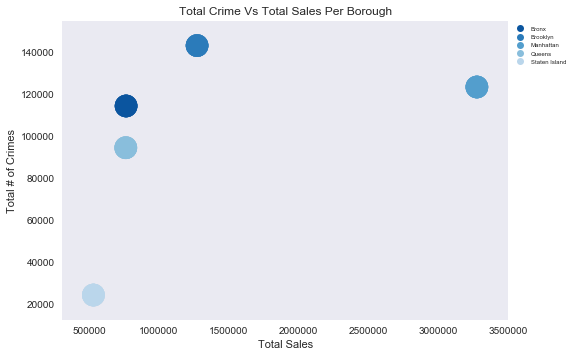

In [44]:
#Crime vs Sales Scatter Plot
x = avg_price_crime_df["Sale Price"]

y = avg_price_crime_df["Total Crime"]

blues = sns.color_palette("Blues_r")


plt.scatter(x, y, alpha=0.75, s=500, color=blues)
plt.title("Total Crime Vs Total Sales Per Borough")
plt.xlabel("Total Sales")
plt.ylabel("Total # of Crimes")

handles = [matplotlib.lines.Line2D([],[], marker="o", color=c, linestyle="none") for c in blues]

plt.legend(handles=handles, labels=list(avg_price_crime_df.index.values), 
           loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1),ncol=1, numpoints=1)

plt.gca().get_legend_handles_labels()[0]; [handle.set_markersize(10) for handle in handles]


#plt.legend(loc='lower right')



plt.savefig("avgprice_crime.png")


plt.show()